In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
df = pd.read_csv('/home/delux/Загрузки/kc_house_data.csv')

In [57]:
x_train = df[['sqft_living15']].values
y_train = df['price'].values

x_train = (x_train - np.mean(x_train)) / np.std(x_train)
y_train = (y_train - np.mean(y_train)) / np.std(y_train)

x_train.shape[0]

2498

In [58]:
def compute_cost(x, y, w, b):

    m = x.shape[0]
    cost_sum = 0

    for i in range(m):

        f_wb = w*x[i] + b

        cost = (f_wb - y[i]) ** 2
        cost_sum += cost
    
    total_cost = 1/(2*m) * cost_sum

    return total_cost

In [59]:
def compute_gradient(x, y, w, b):

    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):

        f_wb = w*x[i] + b

        dj_dw_i = (f_wb - y[i])*x[i]
        dj_db_i = (f_wb - y[i])

        dj_dw += dj_dw_i
        dj_db += dj_db_i
    
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [60]:
def gradient_descent(x, y, w_in, b_in, alpha, epoch, J_hist):

    w = w_in
    b = b_in
    J_hist = []

    for i in range(epoch):

        dj_dw, dj_db = compute_gradient(x, y, w, b)

        w = w - alpha*dj_dw
        b = b - alpha*dj_db
    
        if i < 100000:
            J_hist.append(compute_cost(x, y, w, b))

            if i % 1000 == 0:
                print(f"Cost: {J_hist[-1]}, w: {w}, b: {b}")
        
    return w, b, J_hist

In [61]:
w_initial = 0
b_initial = 0
alpha = 0.01
epoch = 50000
J_hist = []

w, b, J_hist = gradient_descent(x_train, y_train, w_initial, b_initial, alpha, epoch, J_hist)


Cost: [0.49993955], w: [0.00077942], b: [-1.16977862e-18]
Cost: [0.49696251], w: [0.07793882], b: [-1.01592962e-16]
Cost: [0.49696251], w: [0.07794216], b: [-1.0386852e-16]
Cost: [0.49696251], w: [0.07794216], b: [-1.22939644e-16]
Cost: [0.49696251], w: [0.07794216], b: [-1.21864088e-16]
Cost: [0.49696251], w: [0.07794216], b: [-1.21864088e-16]
Cost: [0.49696251], w: [0.07794216], b: [-1.21864088e-16]
Cost: [0.49696251], w: [0.07794216], b: [-1.21864088e-16]
Cost: [0.49696251], w: [0.07794216], b: [-1.21864088e-16]
Cost: [0.49696251], w: [0.07794216], b: [-1.21864088e-16]
Cost: [0.49696251], w: [0.07794216], b: [-1.21864088e-16]
Cost: [0.49696251], w: [0.07794216], b: [-1.21864088e-16]
Cost: [0.49696251], w: [0.07794216], b: [-1.21864088e-16]
Cost: [0.49696251], w: [0.07794216], b: [-1.21864088e-16]
Cost: [0.49696251], w: [0.07794216], b: [-1.21864088e-16]
Cost: [0.49696251], w: [0.07794216], b: [-1.21864088e-16]
Cost: [0.49696251], w: [0.07794216], b: [-1.21864088e-16]
Cost: [0.496962

In [69]:
def compute_output(x,y,w,b):

    m = x.shape[0]
    f_wb = np.zeros(m)

    for i in range(m):

        f_wb[i] = w*x[i] + b
    
    return f_wb

/tmp/ipykernel_19443/1750375141.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f_wb[i] = w*x[i] + b


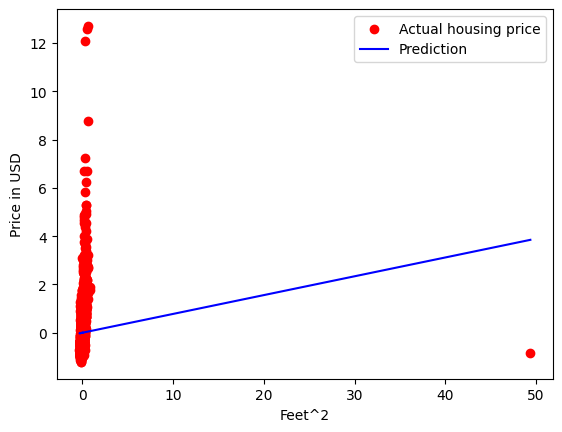

In [70]:
f_wb = compute_output(x_train, y_train, w, b)

plt.scatter(x_train, y_train, c = 'r', label = "Actual housing price")
plt.xlabel("Feet^2")
plt.ylabel("Price in USD")

plt.plot(x_train, f_wb, c='b', label="Prediction")
plt.legend()
plt.show()

<h1> Overall, I can say that it doesn't really work for this dataset, but atleast I learned something new </h1>